<a href="https://colab.research.google.com/github/Amit-Chandra-Das/arsenic-skin-detection/blob/main/Arsenic_Skin_Detection_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arsenic Skin Detection using Machine Learning

### **Objective:** This notebook downloads, preprocesses, and trains a CNN model to classify skin images as 'infected' or 'not_infected' with arsenic.

In [6]:
# Install gdown, a package to download large files from Google Drive

!pip install -q gdown

In [7]:
# Download the zipped dataset from Google Drive using its file ID

!gdown --id 1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT --output ArsenicSkinImageBD.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT
From (redirected): https://drive.google.com/uc?id=1TT-Z1Y9ZLUheDwla31PvLlKeLDT8rJqT&confirm=t&uuid=a75f962e-9db2-4362-b56e-783f127f0d0a
To: /content/ArsenicSkinImageBD.zip
100% 3.54G/3.54G [01:00<00:00, 58.3MB/s]


In [8]:
# Check the directory to confirm 'ArsenicSkinImageBD.zip' was downloaded successfully

!ls

ArsenicSkinImageBD  ArsenicSkinImageBD.zip  sample_data


## Unzip the downloaded dataset

In [9]:
# extracting the compessed dataset
# Extend zip file
from zipfile import ZipFile
dataset = '/content/ArsenicSkinImageBD.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# Check again to confirm the 'ArsenicSkinImageBD' folder was successfully extracted

!ls

ArsenicSkinImageBD  ArsenicSkinImageBD.zip  sample_data


## Importing Libraries

In this cell, we import all the essential Python libraries for this project. These packages will allow us to:
* `os`: Interact with the file system to read file names.
* `numpy`: Work with our images as numerical arrays.
* `matplotlib` & `PIL`: Load, resize, and display the skin images.
* `cv2` (OpenCV): Perform advanced image processing tasks.
* `sklearn`: Split our dataset into training and testing sets.

In [11]:
# --- Core Data Handling & OS Libraries ---
import os            # To interact with the file system (e.g., os.listdir)
import numpy as np   # For numerical operations and creating arrays (for our image data)

# --- Image Processing & Display Libraries ---
import matplotlib.pyplot as plt          # For plotting images and training graphs
import matplotlib.image as mping         # For reading image files into arrays
import cv2                               # OpenCV library for image processing tasks
from google.colab.patches import cv2_imshow # A special function to display OpenCV images in Colab
from PIL import Image                    # Python Imaging Library, used for opening, resizing, and converting images

# --- Machine Learning Library ---

from sklearn.model_selection import train_test_split   # To split our data into training and testing sets

##  Load and Inspect File Names

The next two cells load the lists of all image filenames from both the `infected` and `not_infected` directories. We will print the first 5 and last 5 names from each list to verify that our file paths are correct and the data has loaded as expected.

In [12]:
# See first and last images from dataset
infected_files = os.listdir('/content/ArsenicSkinImageBD/Augmented/infected')
print(infected_files[0:5])
print(infected_files[-5:])

['IMG_1434_augmented_4.png', 'IMG_1354_augmented_4.png', 'IMG_1639_augmented_2.png', 'IMG_1674_augmented_3.png', 'IMG_1413_augmented_5.png']
['IMG_1256_augmented_2.png', 'IMG_1407_augmented_5.png', 'IMG_1295_augmented_4.png', 'IMG_1759_augmented_3.png', 'IMG_1482_augmented_2.png']


In [13]:
not_infected_files = os.listdir('/content/ArsenicSkinImageBD/Augmented/not_infected')
print(not_infected_files[0:5])
print(not_infected_files[-5:])

['IMG20230610180818_augmented_6.png', 'IMG20230807183142_augmented_6.png', 'IMG_20230612_130319_augmented_5.png', 'IMG_20230612_130019_augmented_4.png', 'IMG_20230612_125947_augmented_6.png']
['IMG20230610175859_augmented_3.png', 'IMG-20230529-WA0023_augmented_1.png', 'IMG20230807183557_augmented_5.png', 'IMG20230610180712_augmented_6.png', 'IMG-20230529-WA0041_augmented_3.png']


#### Verify Data Balance

Now that we have the filenames loaded, we will count the total number of images in each class.

 check for **class imbalance**.
* A **balanced dataset** (which we have here, with 4446 images in each class) is ideal, as it prevents the model from being biased toward one class.
* An **imbalanced dataset**  would require special handling during training.

In [14]:
print('Number of with infected images: ',len(infected_files))
print('Number of without infected images: ',len(not_infected_files))

Number of with infected images:  4446
Number of without infected images:  4446


#  Create Numerical Labels (Label Encoding)

Before we can train a model, we must convert our class names ('infected' and 'not_infected') into a numerical format that the model can understand. This process is called **Label Encoding**.

We will assign a unique integer to each class:
* **`1`** →  'infected'
* **`0`** →  'not_infected'

This cell creates two separate lists of labels, one for each class, corresponding to the image file lists we created earlier.

In [15]:
#create the labels

infected_labels = [1]*len(infected_files)
not_infected_labels = [0]*len(not_infected_files)

We'll now print the lengths of our two new label lists. This is to confirm that the number of labels (1s and 0s) we created perfectly matches the number of image files we counted earlier.

In [16]:
# Print the total count of 'infected' (1) labels
print(len(infected_labels))
# Print the total count of 'not_infected' (0) labels
print(len(not_infected_labels))

4446
4446


We'll now inspect the first 5 items from each label list. This is a quick way to verify that the `infected_labels` list contains our `1`s and the `not_infected_labels` list contains our `0`s, as intended.

In [17]:
# Print the first 5 labels from the 'infected' list to confirm they are 1s
print(infected_labels[0:5])
# Print the first 5 labels from the 'not_infected' list to confirm they are 0s
print(not_infected_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


###  Combine Labels into a Single Master List

Now that we have our separate lists of `1`s and `0`s, we need to combine them into one single "master" list of labels.

**Important:** We must concatenate them in the *exact same order* that we added the images to the `data` list (infected images first, then not-infected images). This ensures that each image in the `data` list correctly corresponds to its label in the `labels` list.

We will print the total length and the first and last 5 elements to verify the list is `[1, 1, ..., 0, 0]`.

In [18]:
#combine with and without infected lebels in one list
# This creates our master 'y' variable by concatenating the two label lists
labels = infected_labels + not_infected_labels

# Verify the total length of the new master list (should be 8892)
print(len(labels))

# Verify the beginning of the list (should be 1s)
print(labels[0:5])

# Verify the end of the list (should be 0s)
print(labels[-5:])

8892
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Visual Data Verification

As a final sanity check before preprocessing, we will display one sample image from each class. This helps us visually confirm what the 'infected' (Label 1) and 'not_infected' (Label 0) images look like.

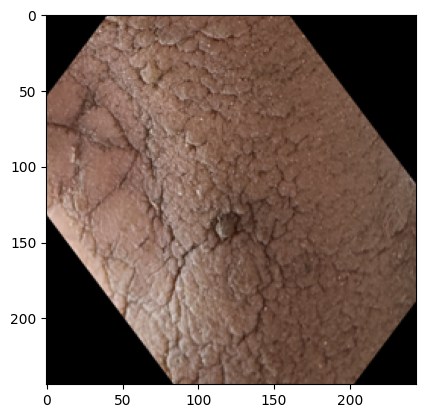

In [19]:
#display with infected image
img = mping.imread('/content/ArsenicSkinImageBD/Augmented/infected/IMG_1187_augmented_6.png')
implot = plt.imshow(img)
plt.show()

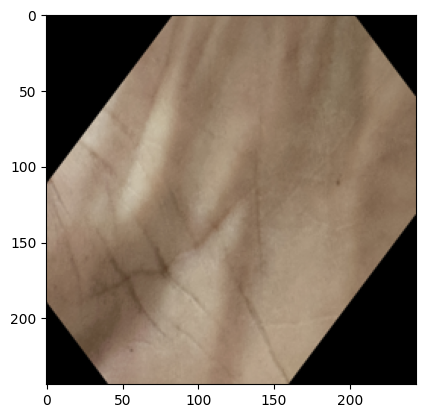

In [20]:
#display without infected image
img = mping.imread('/content/ArsenicSkinImageBD/Augmented/not_infected/IMG_3352_augmented_5.png')
implot = plt.imshow(img)
plt.show()

### Preprocessing: Converting Images to Numerical Data

This is the most important preprocessing step in the project. Our neural network cannot understand "image files" (like .png or .jpg). It can only understand numbers.

This code will loop through all 8,892 image filenames and perform a series of transformations to convert them into a standard, numerical format.

For **each** image, it will:
1.  **Load:** Open the image file from the disk.
2.  **Resize:** Force the image to a standard size of **128x128 pixels**. This is required because a CNN's input layer must receive images of the exact same dimensions.
3.  **Standardize Color:** Convert the image to **'RGB'** (3 color channels). This ensures any grayscale images are also converted, so all data has the same 3-channel format.
4.  **Convert to Array:** Transform the 128x128 image into a NumPy array (a 3D matrix of pixel values) with the shape `(128, 128, 3)`.
5.  **Collect:** Add this new numerical array to a single master list called `data`.

After this cell runs, `data` will be a single large list containing all 8,892 processed images, ready for the next step.

In [21]:
#convert image into numpay array
# --- Part 1: Process 'infected' images ---

# Define the path to the 'infected' image folder for easy access
infected_path = '/content/ArsenicSkinImageBD/Augmented/infected/'

# Create an empty list that will hold all our processed image arrays
data = []

# Loop through every filename in the 'infected_files' list (which has 4446 files)
for img_file in infected_files:

# Open the image file using its full path
  image = Image.open(infected_path + img_file)

  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)


# --- Part 2: Process 'not_infected' images ---
#without infected mask images

not_infected_path = '/content/ArsenicSkinImageBD/Augmented/not_infected/'

for img_file in not_infected_files:

  image = Image.open(not_infected_path + img_file)
  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)

In [22]:
len(data)

8892

In [23]:
type(data)

list

In [24]:
#Checks the data type of the first item in your list.

type(data[0])

numpy.ndarray

array([[[235, 200, 167],
        [240, 208, 174],
        [234, 198, 164],
        ...,
        [219, 183, 162],
        [206, 166, 143],
        [182, 141, 113]],

       [[235, 200, 169],
        [235, 200, 169],
        [235, 199, 166],
        ...,
        [196, 162, 140],
        [191, 154, 130],
        [178, 139, 111]],

       [[238, 206, 174],
        [230, 193, 162],
        [240, 206, 175],
        ...,
        [174, 140, 117],
        [178, 140, 116],
        [178, 139, 113]],

       ...,

       [[ 94,  63,  46],
        [ 89,  57,  42],
        [ 76,  45,  32],
        ...,
        [210, 175, 151],
        [210, 175, 149],
        [205, 169, 143]],

       [[ 86,  54,  40],
        [ 76,  45,  34],
        [ 60,  32,  21],
        ...,
        [208, 173, 148],
        [210, 174, 150],
        [209, 174, 148]],

       [[ 77,  45,  33],
        [ 62,  35,  24],
        [ 45,  24,  15],
        ...,
        [209, 174, 149],
        [206, 170, 144],
        [202, 163, 137]]], dtype=uint8)
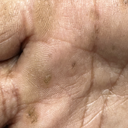

In [25]:
data[6]

In [26]:
data[0].shape

(128, 128, 3)

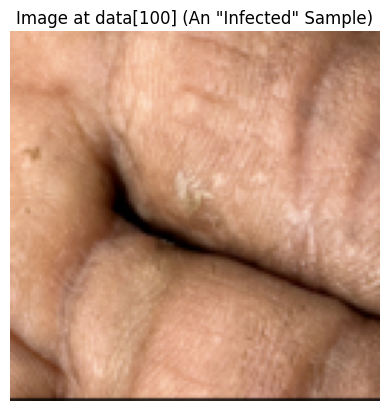

In [27]:
# Use plt.imshow() to display the NumPy array as an image
plt.imshow(data[100])

# Add a title to know what we're looking at
plt.title('Image at data[100] (An "Infected" Sample)')

# Hide the x/y axes for a cleaner look
plt.axis('off')

# Show the plot
plt.show()

###  Convert Data to Final NumPy Array Format

We have our images in a Python `list` called `data` and our labels in a list called `labels`. However, machine learning models (like Keras and Sklearn) cannot be trained on Python lists. They require a single, unified block of data in a format called a **NumPy array**.

This cell performs that final conversion:

* **`x = np.array(data)`:** This "stacks" all 8,892 individual image arrays (each `(128, 128, 3)`) into a single, massive 4-dimensional array. The new shape will be `(8892, 128, 128, 3)`.
* **`y = np.array(labels)`:** This converts the list of `[1, 1, ..., 0, 0]` into a single 1-dimensional array of shape `(8892,)`.

After this, `x` (our data) and `y` (our labels) are in the perfect format for training.

In [28]:
# converting image list and label into numpy array

# Convert the Python 'list' of image arrays (data) into a single 4D NumPy array.
# The 'data' list has 8892 items, each (128, 128, 3).
# 'x' will become a single array of shape (8892, 128, 128, 3).
# This is our 'x' (features/data) for the model.

x = np.array(data)

# Convert the Python 'list' of labels (labels) into a single 1D NumPy array.
# The 'labels' list has 8892 items.
# 'y' will become a single array of shape (8892,).
# This is our 'y' (answers/labels) for the model.

y = np.array(labels)

In [29]:
type(x)

numpy.ndarray

In [30]:
type(y)

numpy.ndarray

In [31]:
print(x.shape)
print(y.shape )

(8892, 128, 128, 3)
(8892,)


### Splitting Data into Training and Testing Sets

This is a critical step to evaluate our model fairly. We must split our dataset into two parts:

* **Training Set (80%):** The "textbook" and "homework" for our model. The model will look at these images (`x_train`) and their correct answers (`y_train`) to learn the patterns.
* **Testing Set (20%):** The "final exam." The model will **never** see these images (`x_test`) during training. We will use this set at the very end to get an honest, unbiased score of how well our model learned to generalize.



We cannot test our model on the same data it was trained on. That would be like giving a student an exam and the answer key at the same time. They would get 100%, but we wouldn't know if they *actually* learned anything. This split prevents that.

This one line of code automatically shuffles and splits our `x` and `y` arrays into four new arrays.

In [32]:
# Use the train_test_split function (from sklearn) to divide our data
#
# INPUTS:
# x: Our complete 4D array of all images (shape: 8892, 128, 128, 3)
# y: Our complete 1D array of all labels (shape: 8892,)
#
# PARAMETERS:
# test_size=0.2: This tells the function to hold back 20% of the data
#                for the test set. The other 80% will become the training set.
#
# random_state=5: This is a "seed" for the random shuffle. By setting a number
#                 (it could be any number, 5 is just a choice), we guarantee
#                 that the split will be *the exact same* every time we run
#                 this code. This is crucial for getting reproducible results.
#
# OUTPUTS:
# x_train: 80% of the images (for training the model)
# x_test:  20% of the images (for testing the model later)
# y_train: 80% of the labels (corresponding to x_train)
# y_test:  20% of the labels (corresponding to x_test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

### Scale Data (Normalization)

Neural networks train faster and more reliably when all data is in a small range. This step scales our pixel values from the `[0, 255]` range down to the `[0.0, 1.0]` range.

In [33]:
# scalling data (This is also called Normalization)

# Divide every pixel value in the training set (x_train) by 255.
# This scales the pixel range from [0, 255] down to [0.0, 1.0].
# The result is stored in a new variable, x_train_scaled.

x_train_scaled = x_train / 255

# Do the *exact same* scaling transformation on the test set.
# We must use the same scaling factor (255) to ensure consistency.

x_test_scaled = x_test / 255

In [34]:
x_train_scaled[0]

array([[[0.69019608, 0.53333333, 0.4       ],
        [0.72156863, 0.56470588, 0.42745098],
        [0.74901961, 0.59607843, 0.4627451 ],
        ...,
        [0.75686275, 0.57647059, 0.46666667],
        [0.75686275, 0.57254902, 0.46666667],
        [0.29411765, 0.22352941, 0.18039216]],

       [[0.71764706, 0.55686275, 0.41960784],
        [0.73333333, 0.57254902, 0.43137255],
        [0.74117647, 0.58431373, 0.45490196],
        ...,
        [0.75294118, 0.57254902, 0.46666667],
        [0.74901961, 0.56470588, 0.45882353],
        [0.29019608, 0.21960784, 0.17647059]],

       [[0.72156863, 0.56078431, 0.42352941],
        [0.7372549 , 0.58039216, 0.44313725],
        [0.75294118, 0.6       , 0.46666667],
        ...,
        [0.74117647, 0.56862745, 0.45882353],
        [0.7372549 , 0.55686275, 0.44313725],
        [0.28627451, 0.21568627, 0.17254902]],

       ...,

       [[0.67058824, 0.46666667, 0.35294118],
        [0.67843137, 0.4745098 , 0.34901961],
        [0.74901961, 0

In [35]:
x_test_scaled[10]

array([[[0.57254902, 0.47843137, 0.34117647],
        [0.72941176, 0.67058824, 0.55294118],
        [0.74117647, 0.68627451, 0.56862745],
        ...,
        [0.87058824, 0.80784314, 0.72941176],
        [0.85490196, 0.78823529, 0.70588235],
        [0.8745098 , 0.81568627, 0.72941176]],

       [[0.56470588, 0.47058824, 0.3254902 ],
        [0.70980392, 0.64313725, 0.52941176],
        [0.76078431, 0.70980392, 0.6       ],
        ...,
        [0.90588235, 0.85490196, 0.78039216],
        [0.91764706, 0.8745098 , 0.81960784],
        [0.90196078, 0.8627451 , 0.80392157]],

       [[0.5254902 , 0.42352941, 0.26666667],
        [0.69803922, 0.62745098, 0.50196078],
        [0.78039216, 0.72941176, 0.62352941],
        ...,
        [0.91372549, 0.8627451 , 0.78823529],
        [0.9372549 , 0.90588235, 0.85882353],
        [0.9254902 , 0.89411765, 0.84313725]],

       ...,

       [[0.25490196, 0.14117647, 0.09019608],
        [0.14509804, 0.02352941, 0.01568627],
        [0.15686275, 0

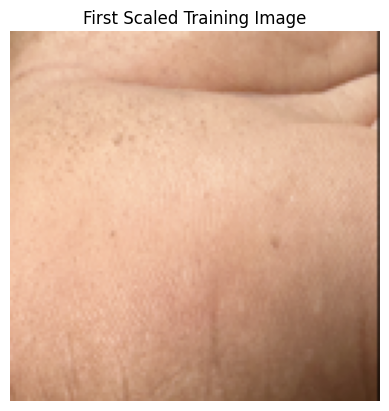

In [36]:
# Display the first image from the scaled training set
plt.imshow(x_train_scaled[0])
plt.title('First Scaled Training Image')
plt.axis('off') # Hide the axes
plt.show()

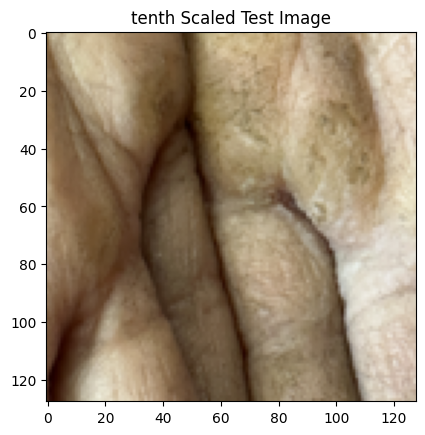

In [37]:
# Display the tenth image from the scaled testing set
plt.imshow(x_test_scaled[10])
plt.title('tenth Scaled Test Image')
#plt.axis('off') # Hide the axes
plt.show()

# Building Convolutional Neural Network (CNN)

### Import TensorFlow Library

This is the most important import. We are loading **TensorFlow**, which is the main Google library for building and training deep learning models.

We also import `keras`, which is the part of TensorFlow that makes it easy to define our model's layers.

In [38]:
# Import the main TensorFlow library, giving it the standard nickname 'tf'
import tensorflow as tf

# From TensorFlow, import the 'keras' module, which is the user-friendly
# API (toolbox) we will use to build our model layers
from tensorflow import keras

###  Build the Baseline CNN Model

This is the architecture for our first model. We are building a **Sequential** model, which means we are stacking layers on top of each other, one after another.

The model works in two stages:
1.  **Feature Extractor (Conv2D/Pool):** These layers scan the image to find important patterns, edges, and textures.
2.  **Classifier (Dense/Dropout):** These layers take the list of patterns and make a final decision.

In [39]:
# Set the number of possible outputs: 2 (infected or not_infected)
num_of_classes = 2

# Initialize a standard "stack-of-layers" model
model = keras.Sequential()

# --- Part 1: Feature Extractor ---

# 1st Convolutional Block
# Find 32 different patterns (3x3 pixels). 'relu' is the standard activation.
# 'input_shape' *must* match our images: (128px high, 128px wide, 3 color channels)
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# Shrink the feature map by 75% (takes the max value from 2x2 blocks)
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# 2nd Convolutional Block
# Find 64 patterns. We use more filters as we go deeper to find complex patterns.
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# Shrink the feature map again
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# --- Part 2: Classifier ---

# "Flatten" the 2D feature maps into a single, long 1D vector
# This connects the "finder" part to the "decider" part
model.add(keras.layers.Flatten())

# 1st Dense Layer (a standard fully-connected "brain" layer with 128 neurons)
model.add(keras.layers.Dense(128, activation='relu'))
# Dropout layer: Randomly "turns off" 50% of neurons during training
# This is a key technique to prevent the model from just memorizing the images (overfitting)
model.add(keras.layers.Dropout(0.5))

# 2nd Dense Layer (fewer neurons, 64)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # Add dropout again

# (You have correctly "commented out" this 3rd layer, making it inactive)
#model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dropout(0.5))

# --- Output Layer ---
# Final layer with 2 neurons (one for each class).
# 'softmax' activation converts the output into probabilities
# e.g., [0.9, 0.1] (90% chance it's class 0, 10% chance it's class 1)
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

This output confirms our model is built correctly and shows us:

The layers are added in order.

The Output Shape after each layer

The number of parameters (weights) the model has to learn

In [44]:
# 'compile' configures the model for the training process
model.compile(

    # 'adam' is the optimizer (the "engine" for learning)
    optimizer='adam',

    # 'loss' is the "scorecard" to measure error
    loss='sparse_categorical_crossentropy',

    # 'metrics' is the "scoreboard" to show us.
    # Use the full string 'accuracy' instead of 'acc'
    metrics=['accuracy']
)

### Train the Model

Now we "fit" the model to our data. This is the command that starts the training process.

The model will:
1.  Look at our scaled training images (`x_train_scaled`) and their labels (`y_train`).
2.  Make a guess.
3.  Check its guess against the real answer and measure its error (the `loss`).
4.  Use the `adam` optimizer to adjust its internal "weights" to make a better guess next time.
5.  Repeat this for all the images, 10 times (`epochs=10`).

In [45]:
# 'fit' starts the training. We save the training log (like accuracy/loss)
# into the 'history' variable, which we can plot later.

history = model.fit(

    # 1. The training images (the "homework")
    x_train_scaled,

    # 2. The training labels (the "answer key")
    y_train,

    # 3. Use 10% of the training data as a "quiz" (validation set)
    #    to check for overfitting (memorization)
    validation_split=0.1,

    # 4. 'epochs=10' means the model will "study" the entire dataset 10 times
    epochs=10
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 153s 750ms/step - accuracy: 0.7779 - loss: 0.4433 - val_accuracy: 0.7388 - val_loss: 0.4951
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 149s 740ms/step - accuracy: 0.8024 - loss: 0.4104 - val_accuracy: 0.7598 - val_loss: 0.5633
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 199s 726ms/step - accuracy: 0.7917 - loss: 0.4263 - val_accuracy: 0.7458 - val_loss: 0.5339
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 211s 770ms/step - accuracy: 0.8146 - loss: 0.3909 - val_accuracy: 0.7781 - val_loss: 0.5170
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 153s 762ms/step - accuracy: 0.8527 - loss: 0.3435 - val_accuracy: 0.8062 - val_loss: 0.6673
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 150s 747ms/step - accuracy: 0.8759 - loss: 0.2970 - val_accuracy: 0.8666 - val_loss: 0.4319
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 149s 741ms/step - accuracy: 0.8959 - loss: 0.2562 - val_accuracy: 0.8329 - val_loss: 0.5804
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 202s 743ms/step - accuracy: 0.8916 -

### Evaluate the Model (The "Final Exam")

The training is complete. Now, we use `model.evaluate()` to test our model on the 20% "test set" (`x_test_scaled`) that it has **never** seen before.

This gives us the final, official accuracy score for our baseline CNN.

In [46]:
# 'evaluate' tests the model on the unseen test data.
# It returns the final loss (error) and accuracy.
loss, accuracy = model.evaluate(x_test_scaled, y_test)

# Print the final loss
print(f'Test Loss: {loss}')

# Print the final, official accuracy score for this model
print(f'Test Accuracy: {accuracy}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.8500 - loss: 0.6449
Test Loss: 0.6856356263160706
Test Accuracy: 0.8544126152992249


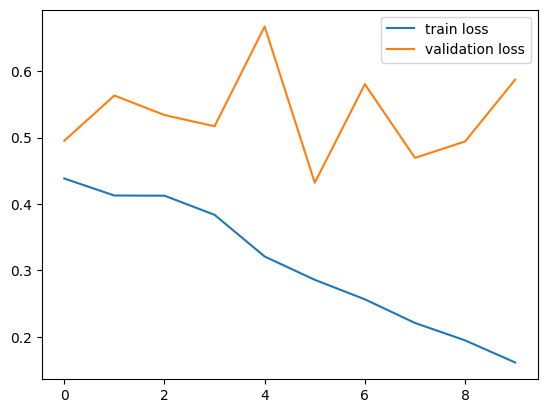

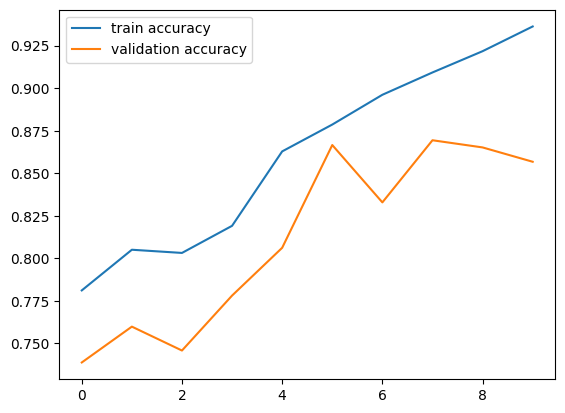

In [50]:
h = history

# --- Plot 1: Loss Value (This part was correct) ---
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# --- Plot 2: Accuracy Value (This part is corrected) ---

# FIXED: 'plt.plot' (not 'plost') and 'accuracy' (not 'acc')
plt.plot(h.history['accuracy'], label='train accuracy')

# FIXED: 'val_accuracy' (not 'val_acc')
plt.plot(h.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.show()

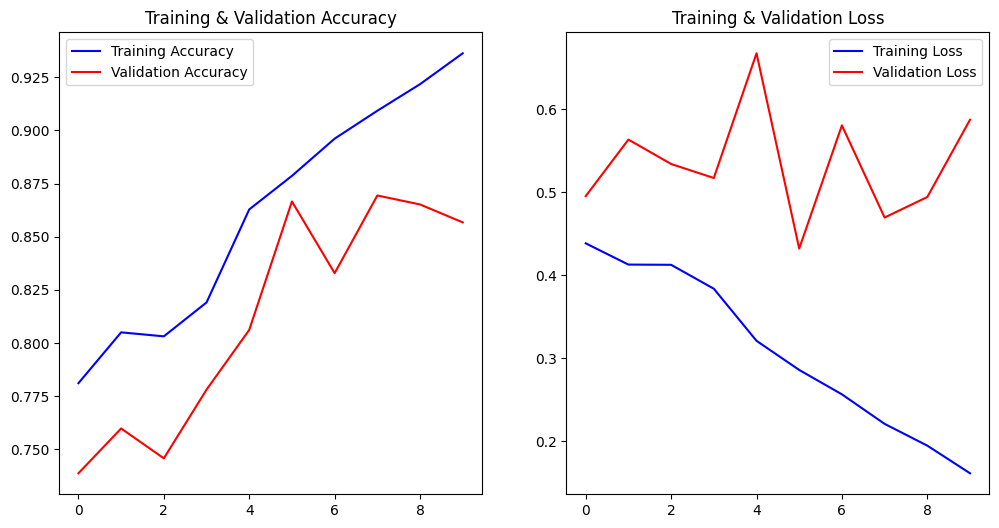

In [49]:
# Create a new figure with 2 subplots (1 row, 2 columns) to show side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Make the figure wide (12) and short (6)

# --- Plot 1: Accuracy ---
ax[0].plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()

# --- Plot 2: Loss ---
ax[1].plot(history.history['loss'], color='b', label='Training Loss')
ax[1].plot(history.history['val_loss'], color='r', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()

# Display the plots
plt.show()

the graphs show your model is overfitting. This means it memorized the training pictures instead of learning the real patterns.

Accuracy Graph (Left): The model got better at its "homework" (blue line), but it stopped improving on the "quiz" (orange line). A big gap formed.

Loss/Error Graph (Right): This is the key. The model's error on the "quiz" (orange line) started to go back up after epoch 6. This is the classic sign of memorization.

In [51]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Get the model's predictions on the test set.
# This gives probabilities (e.g., [0.1, 0.9])
y_pred_probs = model.predict(x_test_scaled)

# 2. Convert those probabilities into a final class (0 or 1)
# np.argmax finds the index of the highest value.
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Print the full report.
# This compares the true labels (y_test) with your model's predictions (y_pred)
print(classification_report(y_test, y_pred, target_names=['Not Infected (0)', 'Infected (1)']))

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step
                  precision    recall  f1-score   support

Not Infected (0)       0.86      0.85      0.85       884
    Infected (1)       0.85      0.86      0.86       895

        accuracy                           0.85      1779
       macro avg       0.85      0.85      0.85      1779
    weighted avg       0.85      0.85      0.85      1779



In [53]:
from sklearn.metrics import classification_report
import numpy as np

# Get the model's predictions on the test set
y_pred_probs = model.predict(x_test_scaled)

# Convert probabilities into final class (0 or 1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print the full report
print("--- Baseline CNN Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Not Infected (0)', 'Infected (1)']))

56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step
--- Baseline CNN Classification Report ---
                  precision    recall  f1-score   support

Not Infected (0)       0.86      0.85      0.85       884
    Infected (1)       0.85      0.86      0.86       895

        accuracy                           0.85      1779
       macro avg       0.85      0.85      0.85      1779
    weighted avg       0.85      0.85      0.85      1779



## Baseline CNN Classification Report

The model was tested on 1779 images:
884 Not Infected, 895 Infected

Key Metrics:

* Accuracy:  85% → Model predicts correctly in 85% of cases

* Precision (Infected = 0.85): Out of all images predicted as infected, 85% were correct

* Recall (Infected = 0.86): The model detected 86% of actual infected images

* F1-Score (Infected = 0.86): Balanced performance combining precision & recall

In simple words:
The baseline CNN model performs well and is able to detect arsenic skin infection with good balance and reliability. This is a strong starting point for improvement using transfer learning.